# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [4]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [5]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri May 13 16:48:27 2022


In [6]:
#import os
import re
import glob

from collections import namedtuple

## 1D 

In [7]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.)
df

,dtime,x,y,energy
0,0.511429,0.229383,0.032037,42.620785
1,0.708803,0.404363,0.254113,40.365631
2,0.319118,-0.273559,0.257847,40.047436
3,0.576424,-0.086756,-0.354368,38.484875
4,0.694631,-0.178629,0.065334,38.152055
...,...,...,...,...
78495,0.753581,0.062244,-0.362294,38.149858
78496,0.566552,0.188798,0.148942,38.017394
78497,0.803752,-0.008674,-0.127085,40.245903
78498,0.968452,0.229668,-0.410295,35.198688


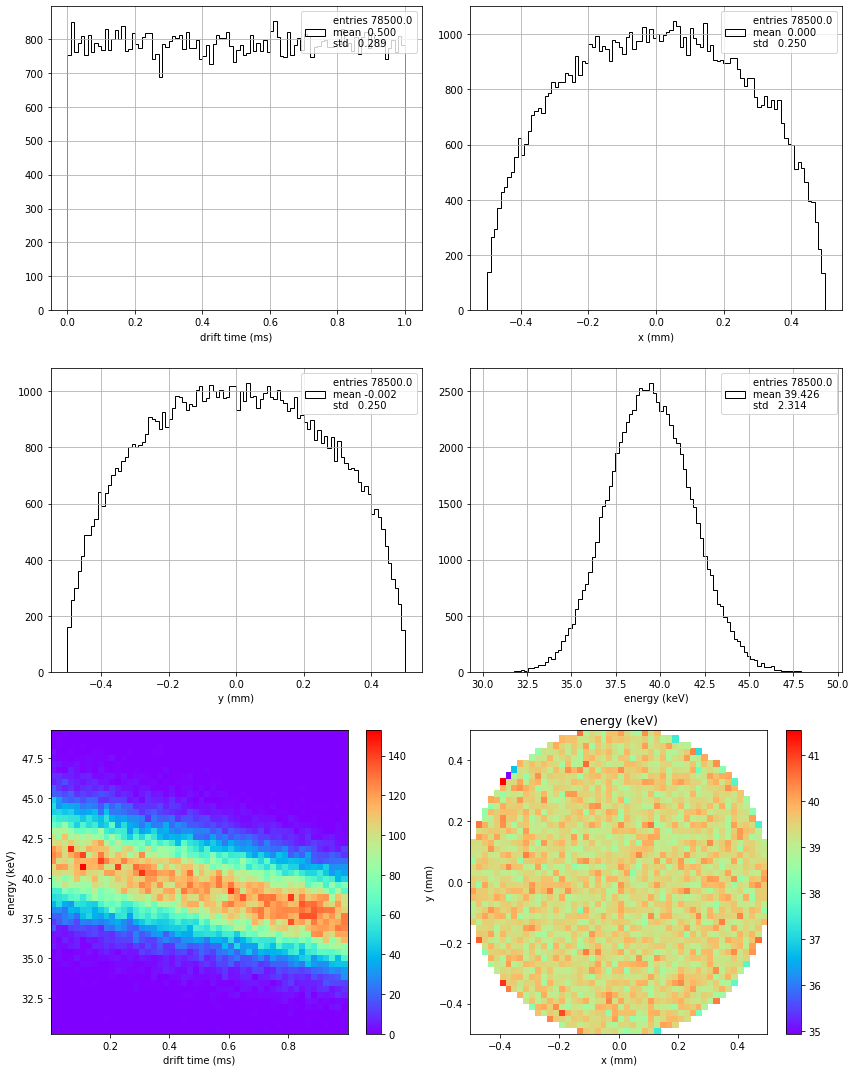

In [8]:
krana.plot_data(df, 50)

In [13]:
coors  = (df.dtime.values,)
energy = df.energy.values
bins   = 100
krmap, residuals  = prof.profile(coors, energy, bins)

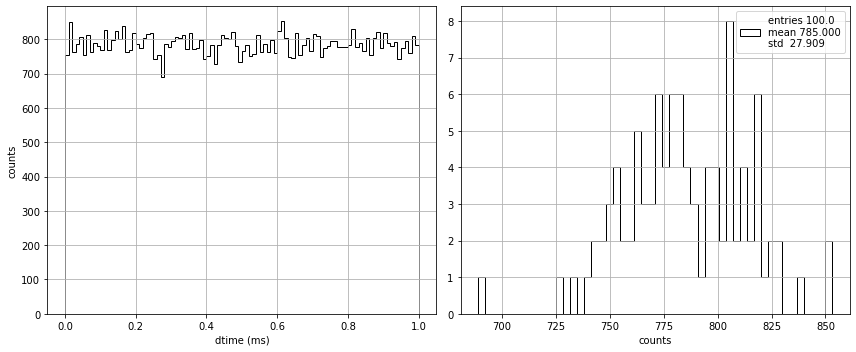

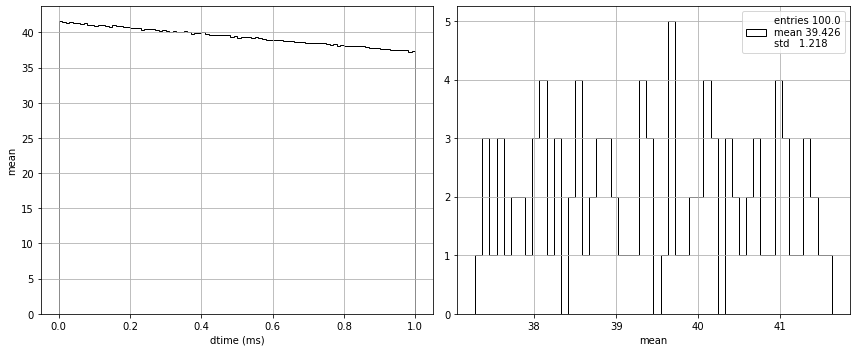

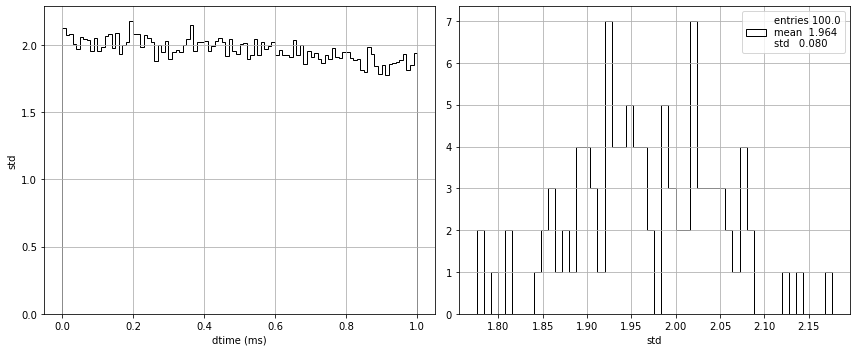

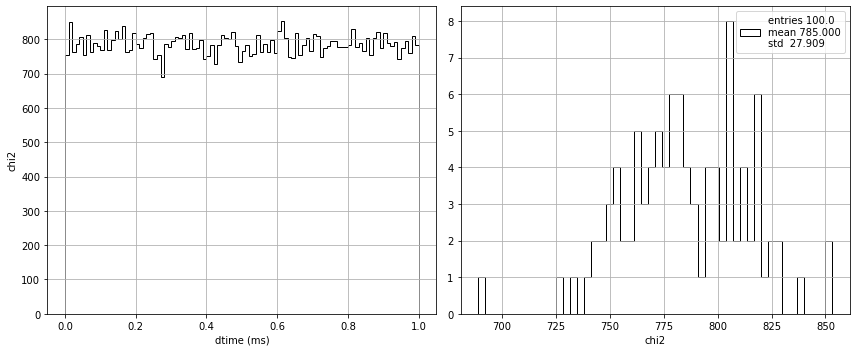

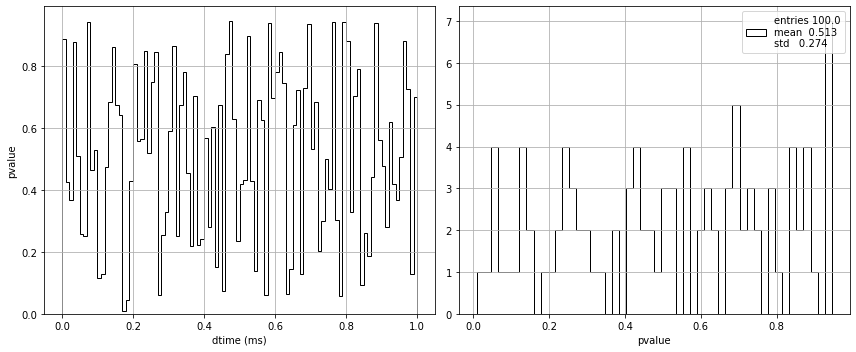

In [14]:
prof.plot_profile(krmap, coornames = ('dtime (ms)',))

### correction

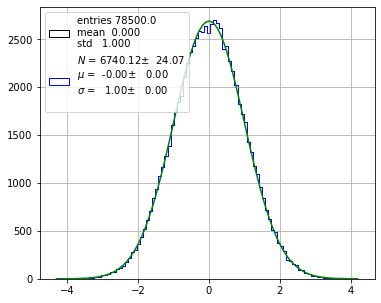

In [15]:
pltext.canvas(1, 1);
pltext.hist(residuals, 100);
pltext.hfit(residuals, 100, fun = 'gaus');

In [55]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap, res  = prof.profile(coors, corenergy, bins)

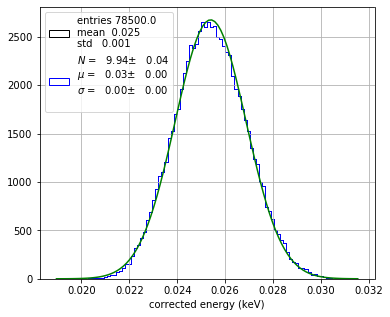

In [56]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)');

In [57]:
prof.save(krmap, 'test', 'test.h5')

In [58]:
kk = prof.load('test', 'test.h5')

### Validate correction

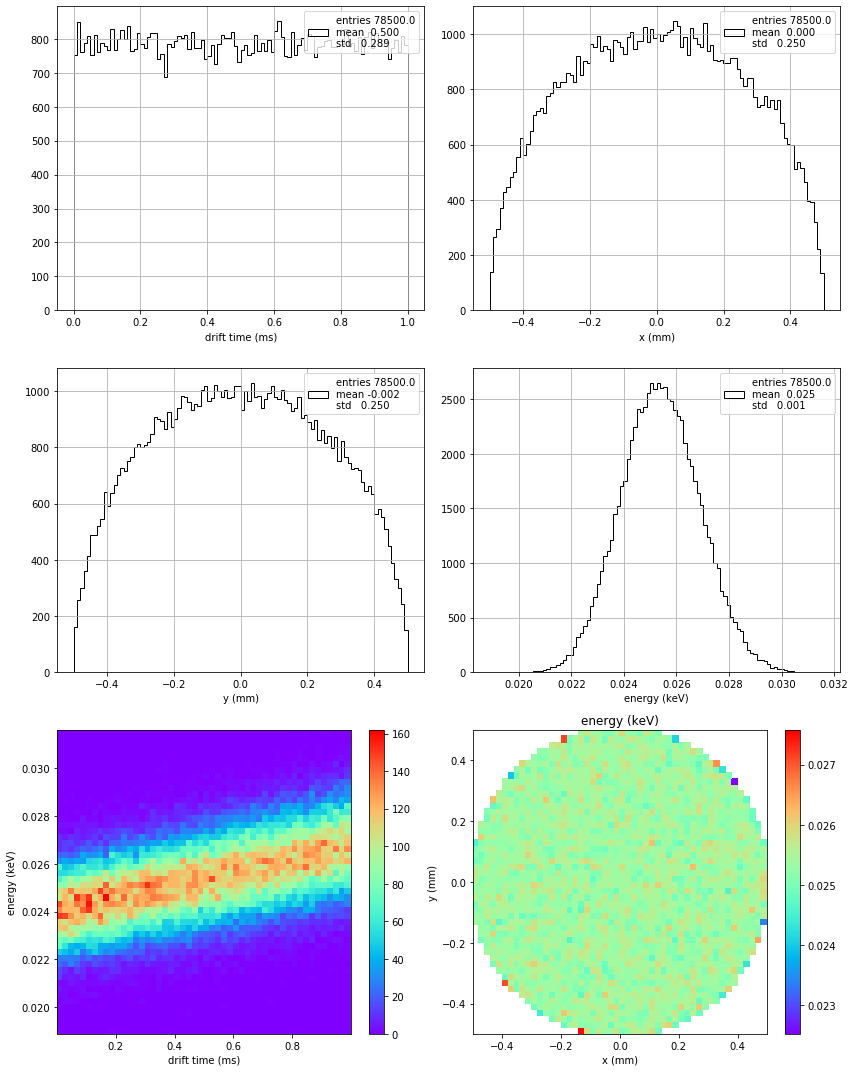

In [59]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

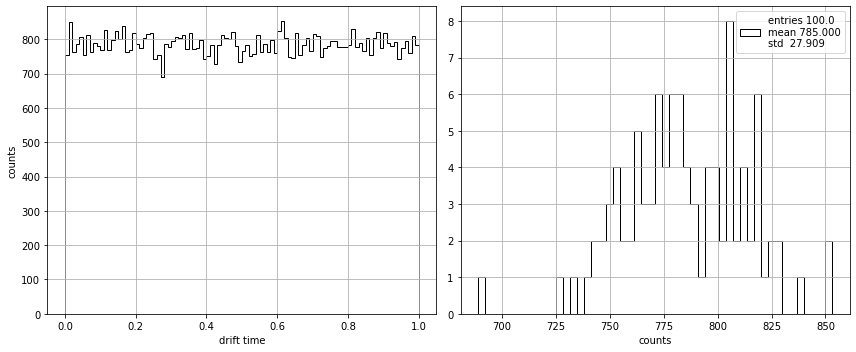

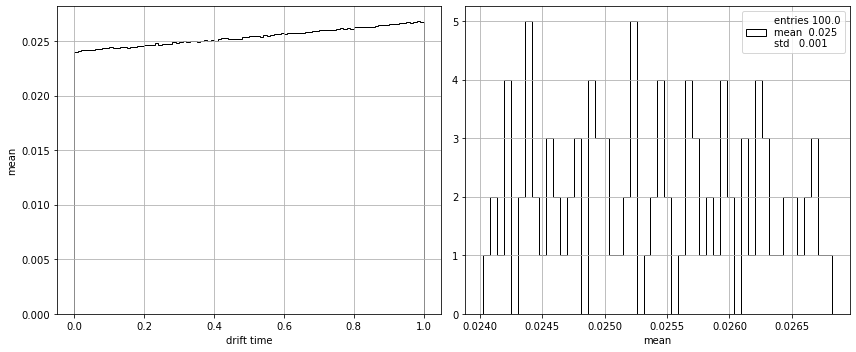

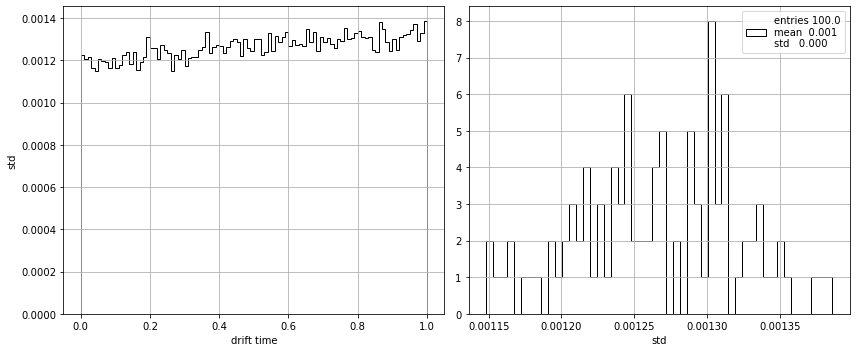

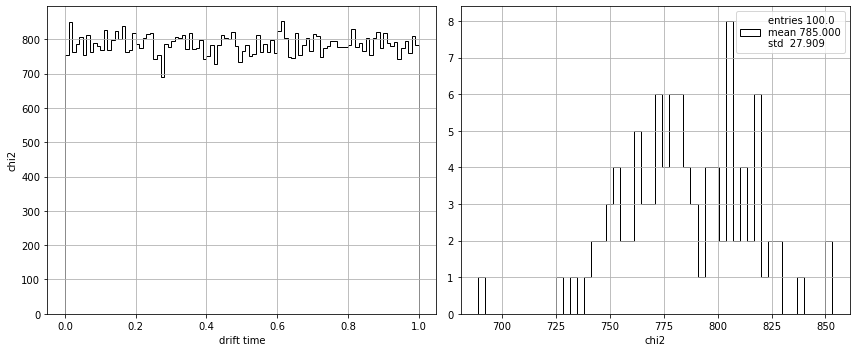

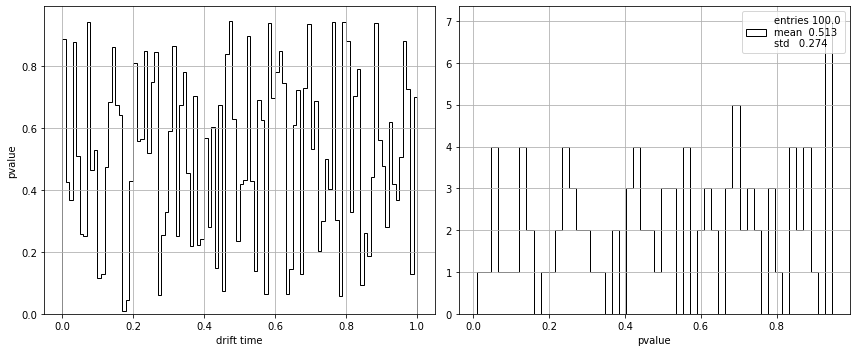

In [60]:
prof.plot_profile(corkrmap, coornames = ('drift time',))

## 2D

In [61]:
df = krana.generate_kr_toy(100000, tau = 0., beta = 0.2)
df

,dtime,x,y,energy
0,0.181104,0.013962,-0.376008,37.915202
1,0.120099,-0.139264,-0.081107,39.927358
2,0.604140,0.304644,0.161454,35.497970
3,0.439827,-0.274955,-0.001456,40.338311
4,0.810217,-0.002964,0.189141,42.554834
...,...,...,...,...
78578,0.920343,-0.000579,0.456079,35.665641
78579,0.147028,0.109439,0.246499,40.647759
78580,0.938110,0.104325,-0.414712,34.319614
78581,0.077442,-0.042264,-0.141290,41.203304


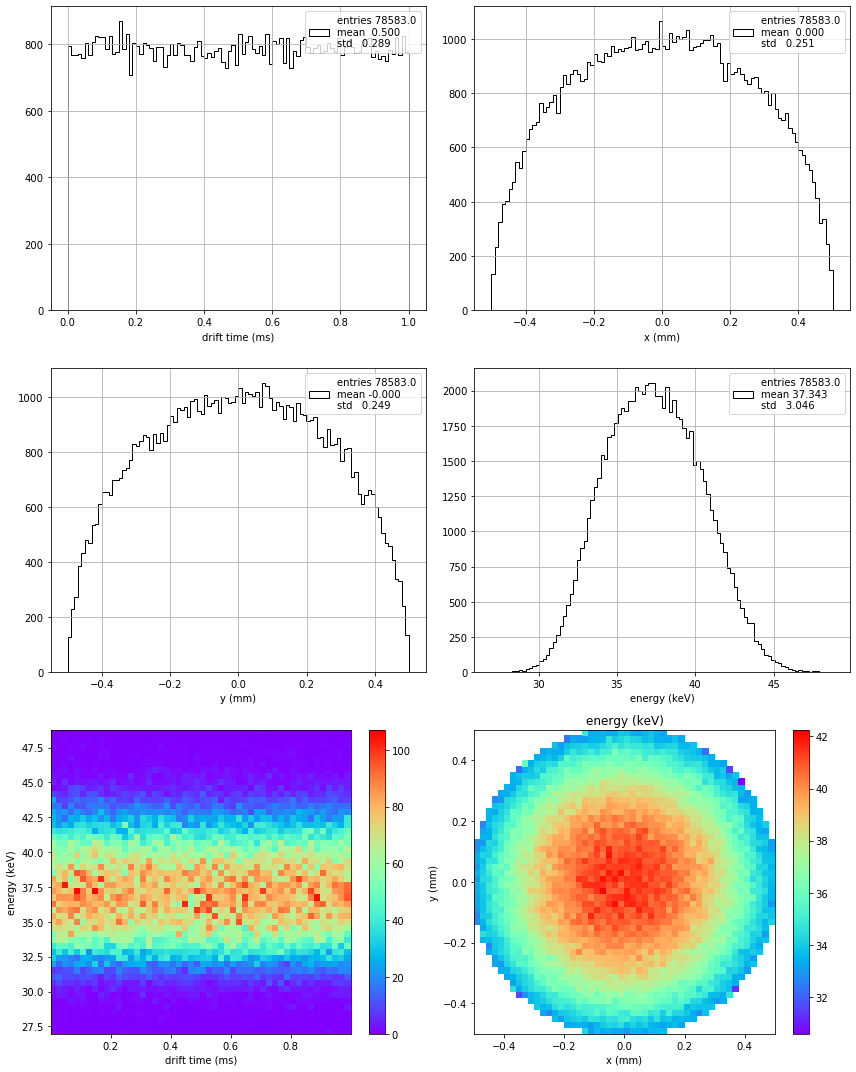

In [62]:
krana.plot_data(df, 50)

### kr  map

In [63]:
coors  = (df.x.values, df.y.values)
energy = df.energy.values
bins   = 40, 40
krmap, residuals  = prof.profile(coors, energy, bins)

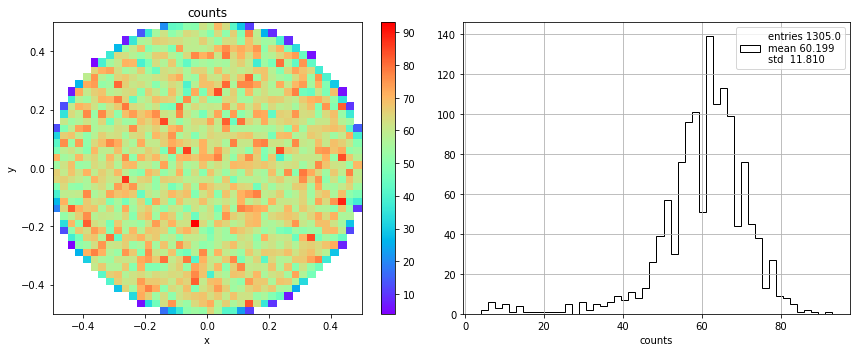

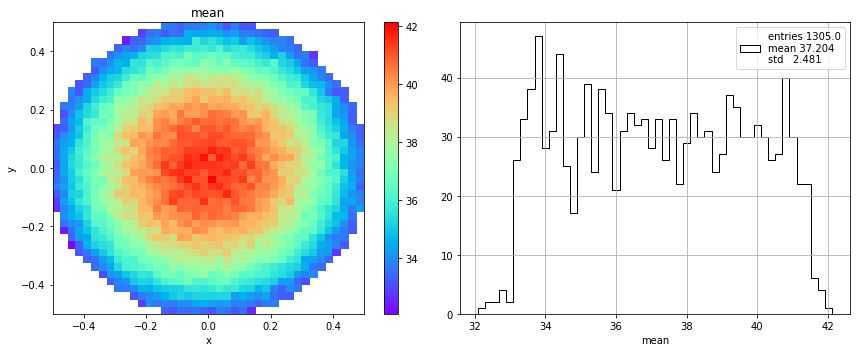

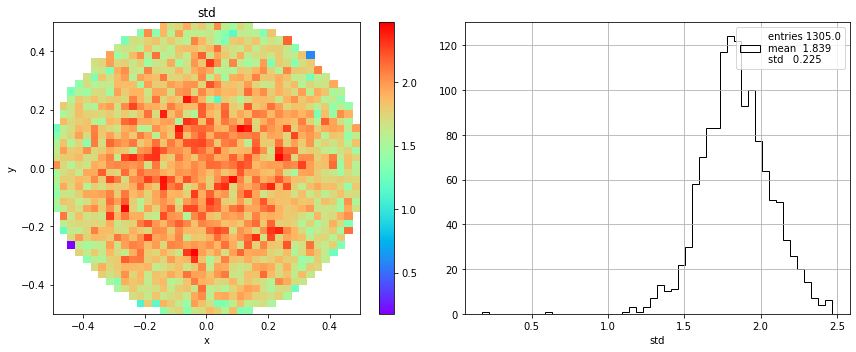

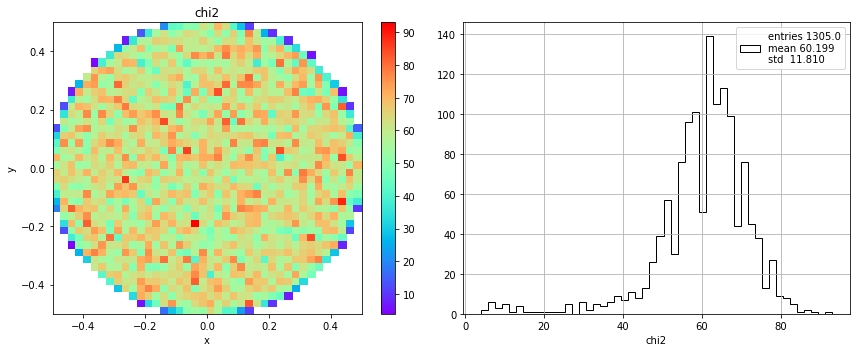

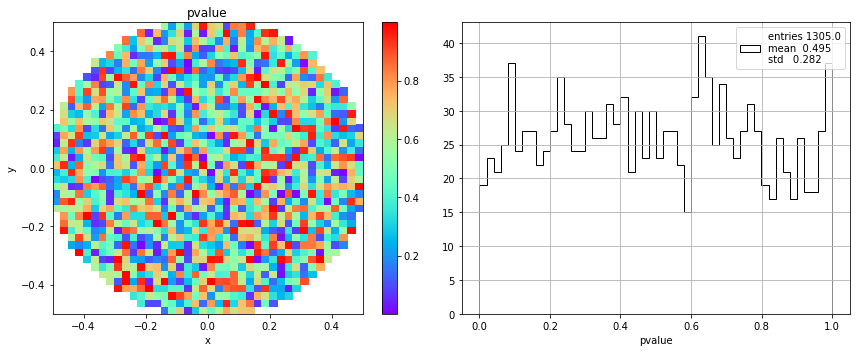

In [64]:
prof.plot_profile(krmap)

### Correction

In [65]:
corenergy    = prof.profile_scale(coors, energy, krmap)
corkrmap, _  = prof.profile(coors, corenergy, bins)

Text(0.5, 0, 'corrected energy (keV)')

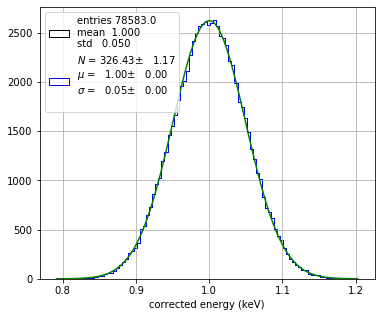

In [66]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)')

### Validate correction

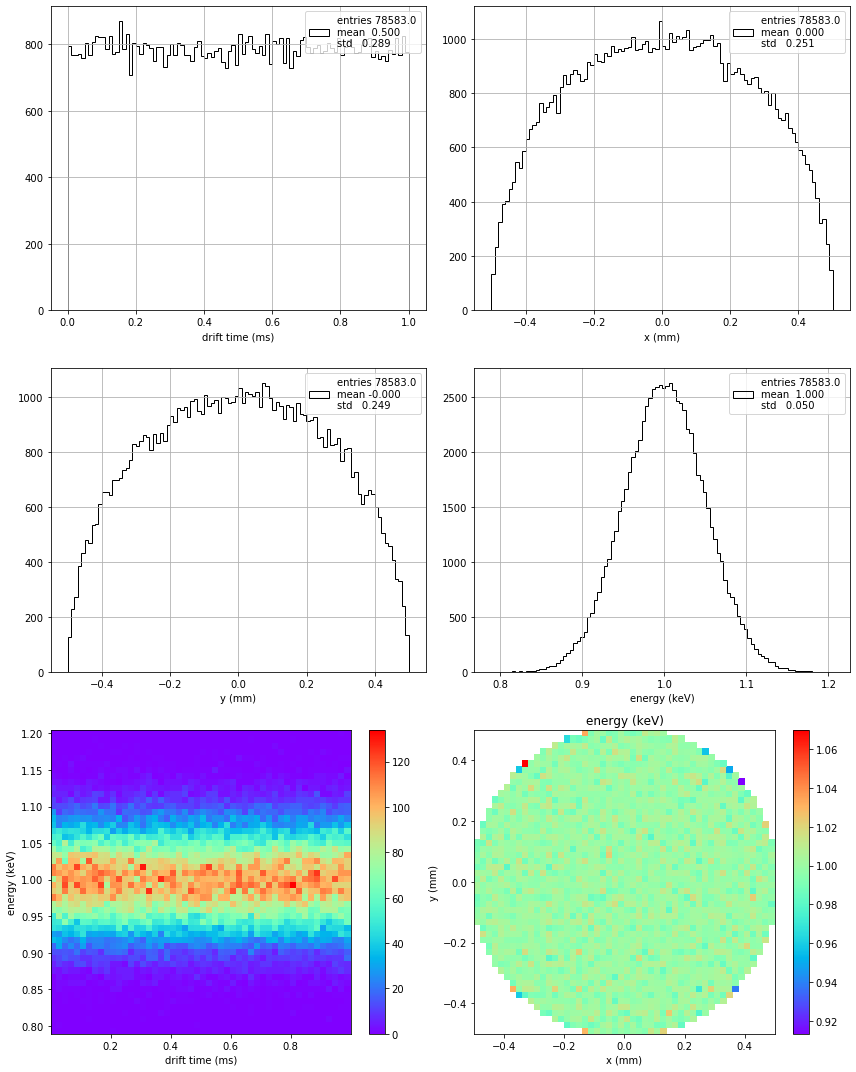

In [67]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

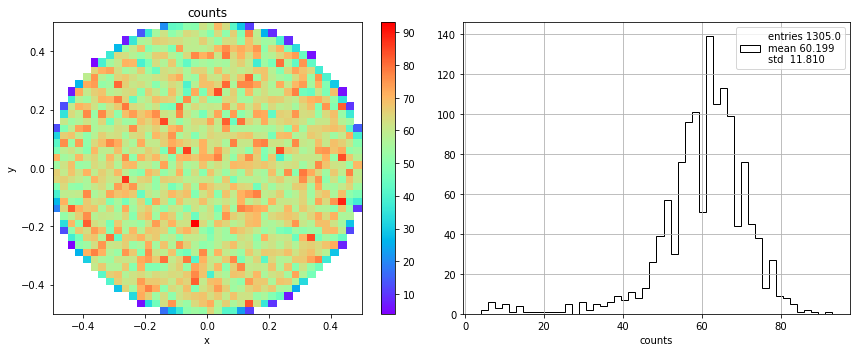

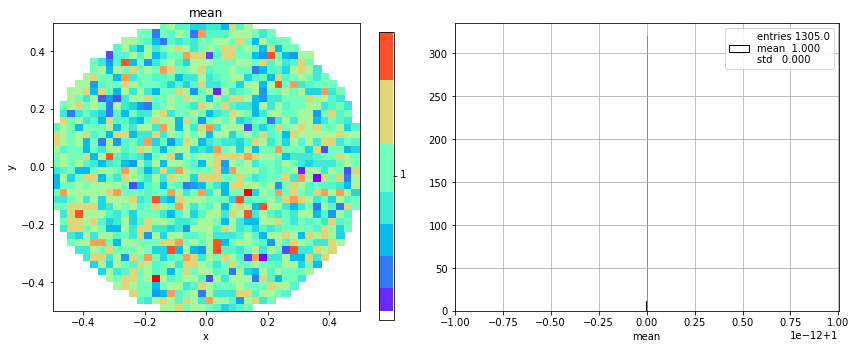

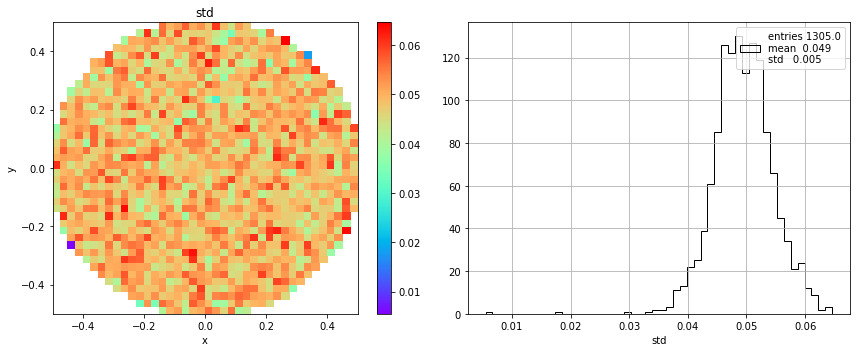

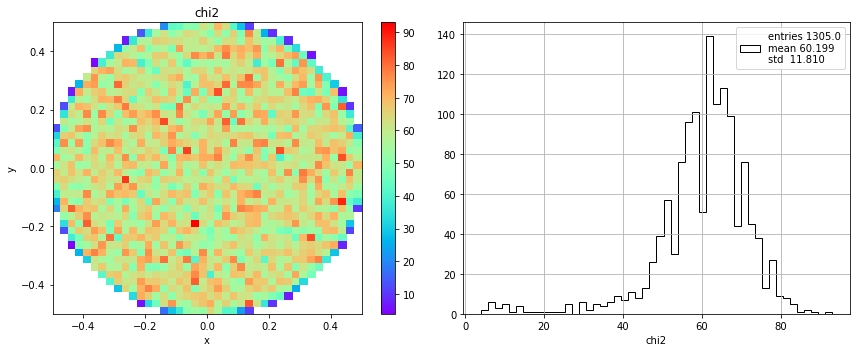

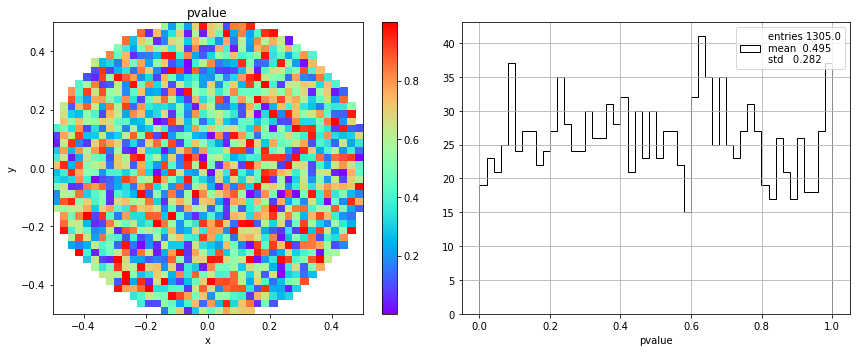

In [68]:
prof.plot_profile(corkrmap)

## 3D

In [69]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2)
df

,dtime,x,y,energy
0,0.127725,-0.197978,0.190973,39.502129
1,0.059211,-0.004071,-0.137981,42.165711
2,0.875809,0.136644,-0.377665,31.933207
3,0.834191,0.444592,0.116849,33.238824
4,0.855595,0.070231,-0.447702,33.317232
...,...,...,...,...
78738,0.548596,-0.210008,-0.055105,40.775072
78739,0.563419,0.448777,-0.156584,30.706264
78740,0.618943,0.141997,0.462764,31.375274
78741,0.412519,-0.271995,0.320769,35.635935


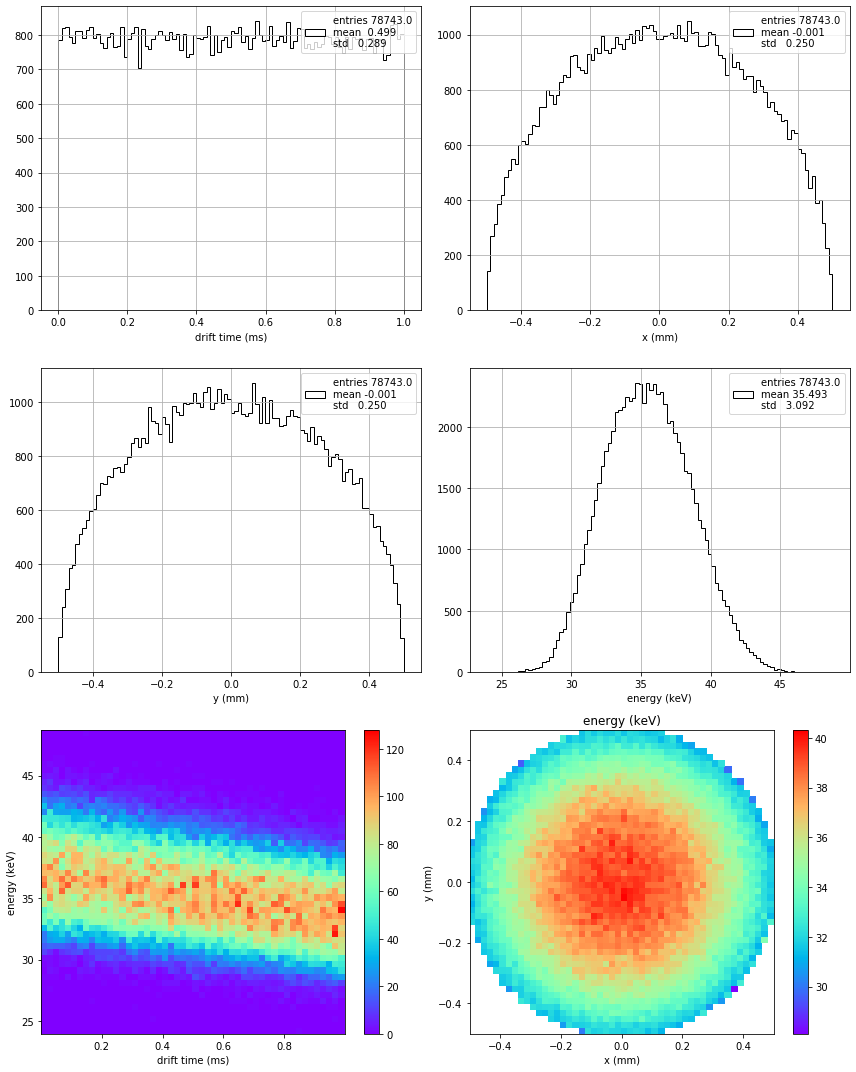

In [70]:
krana.plot_data(df, 50)

### Kr map

In [71]:
coors  = (df.x.values, df.y.values, df.dtime.values)
energy = df.energy.values
bins   = 20, 20, 4
krmap , residuals = prof.profile(coors, energy, bins)

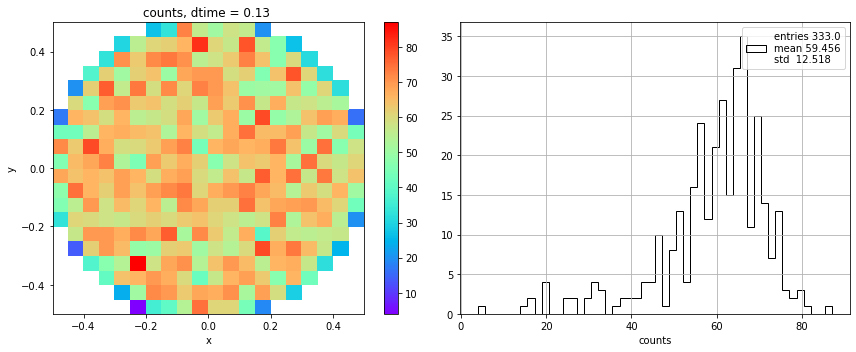

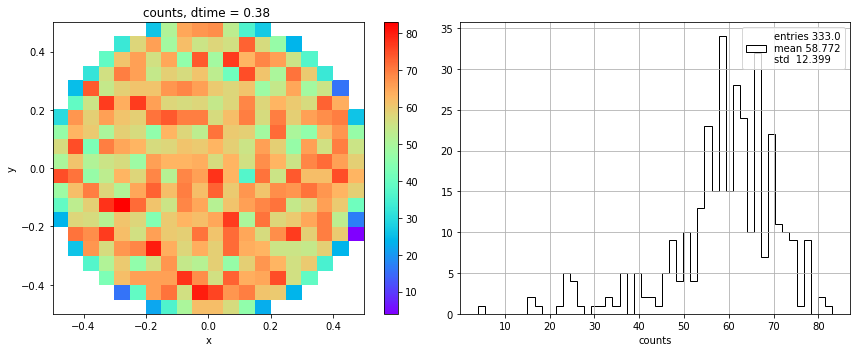

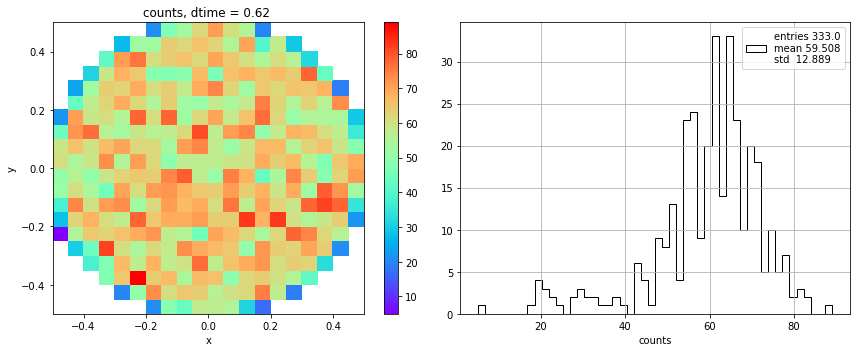

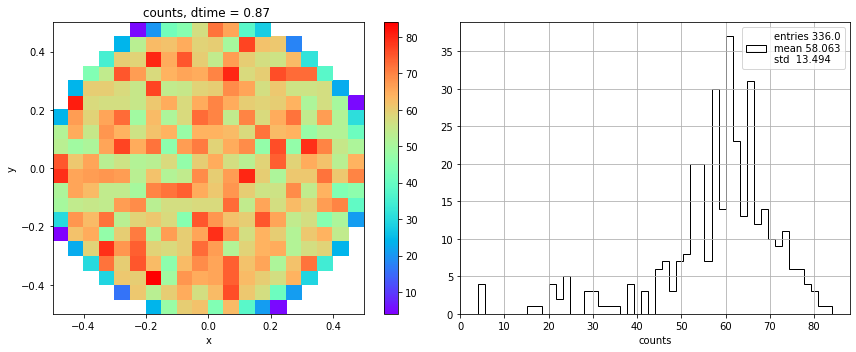

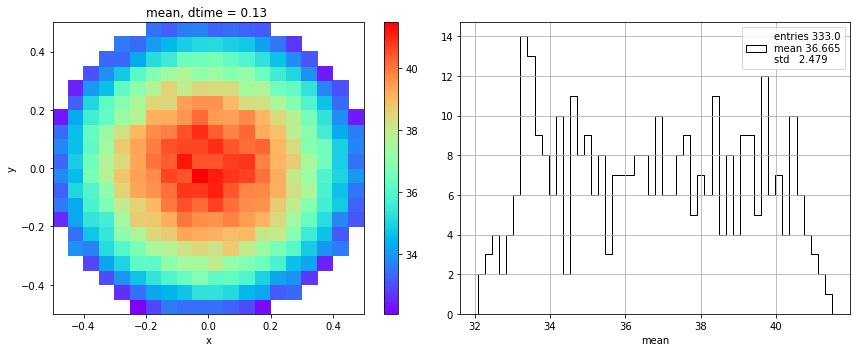

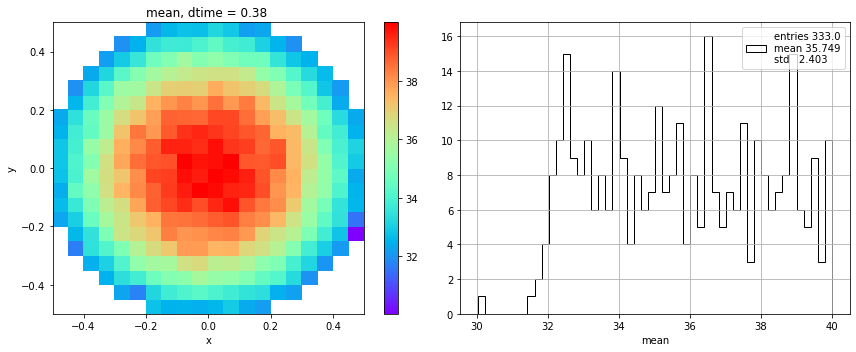

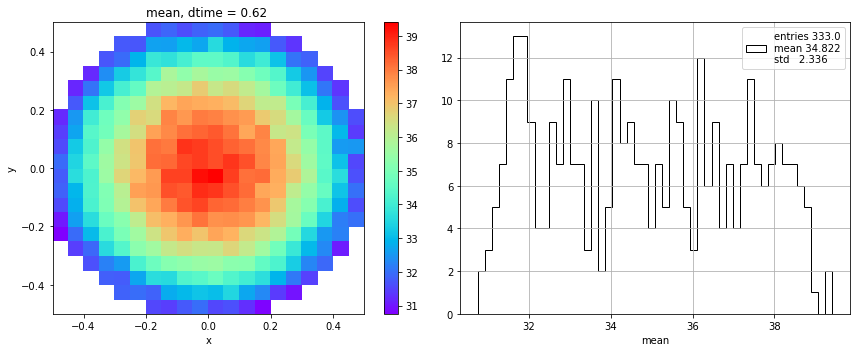

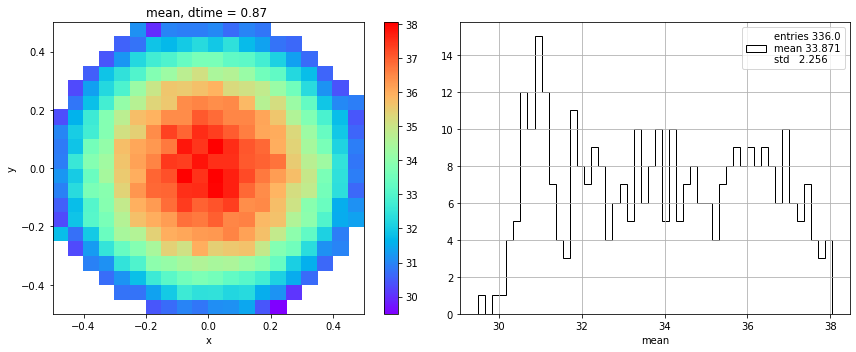

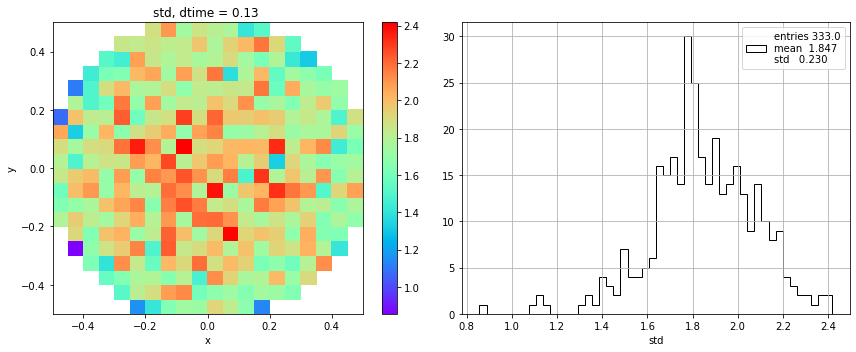

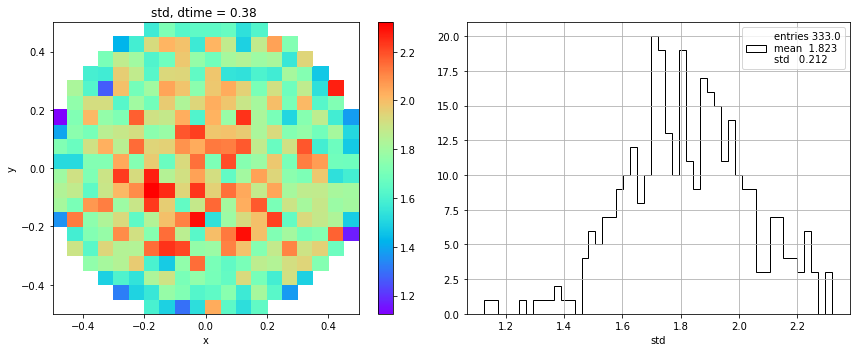

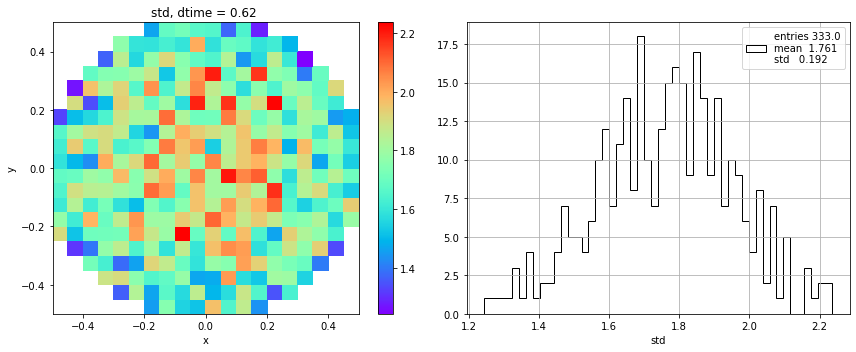

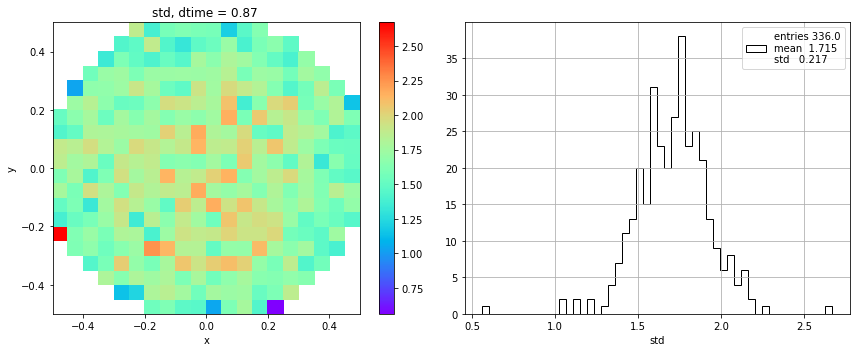

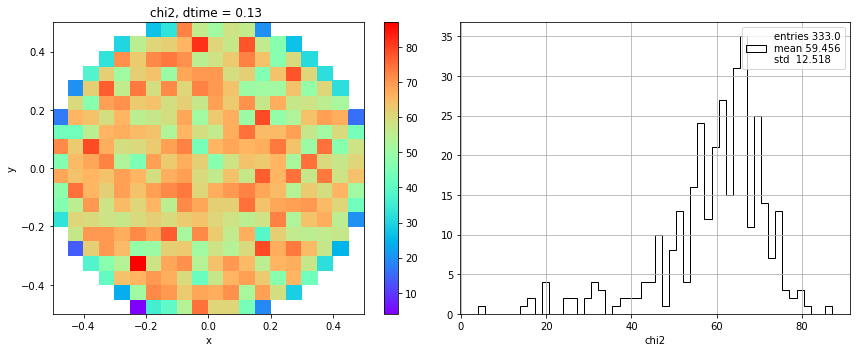

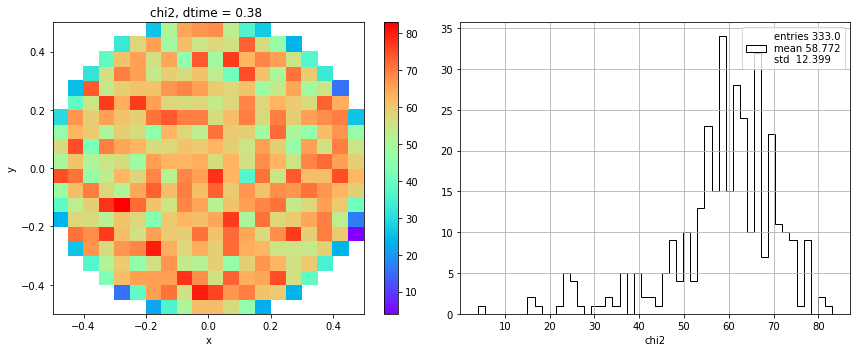

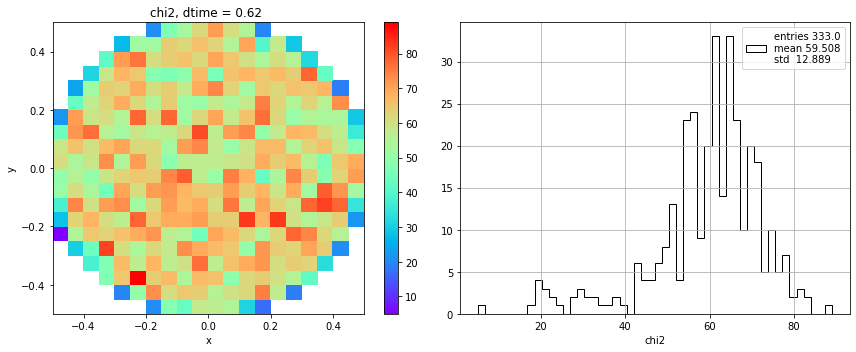

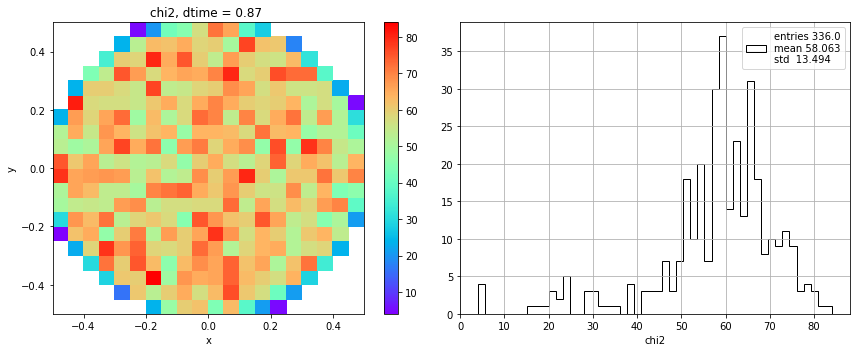

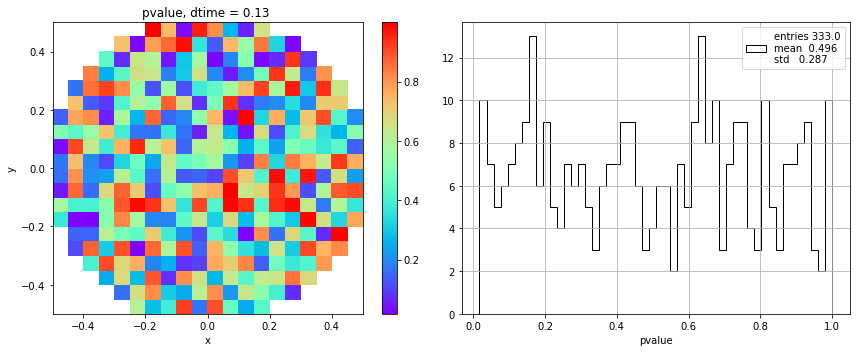

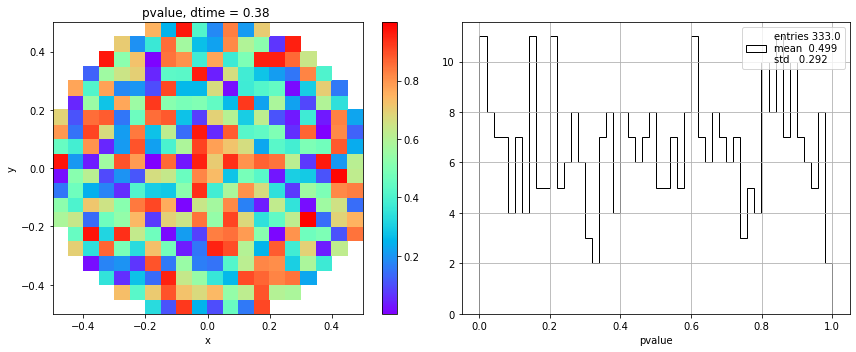

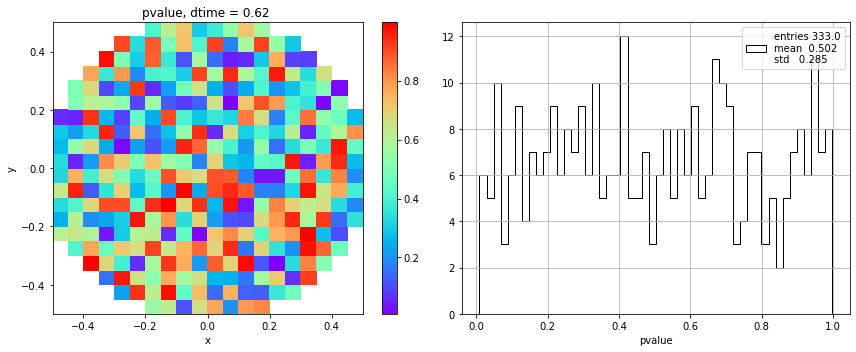

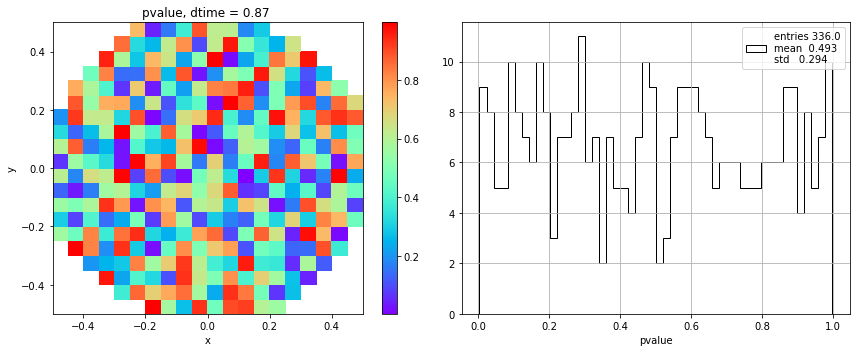

In [72]:
prof.plot_profile(krmap, coornames = ('x', 'y', 'dtime'));

### corrections

In [73]:
corenergy    = prof.profile_scale(coors, energy, krmap)
corkrmap, _  = prof.profile(coors, corenergy, bins)

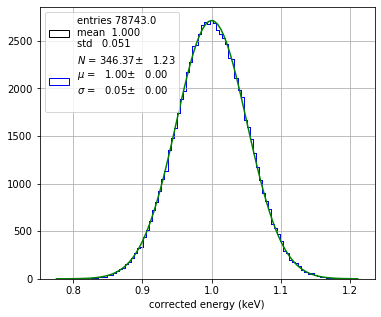

In [74]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus')
plt.xlabel('corrected energy (keV)');

### Validate correction

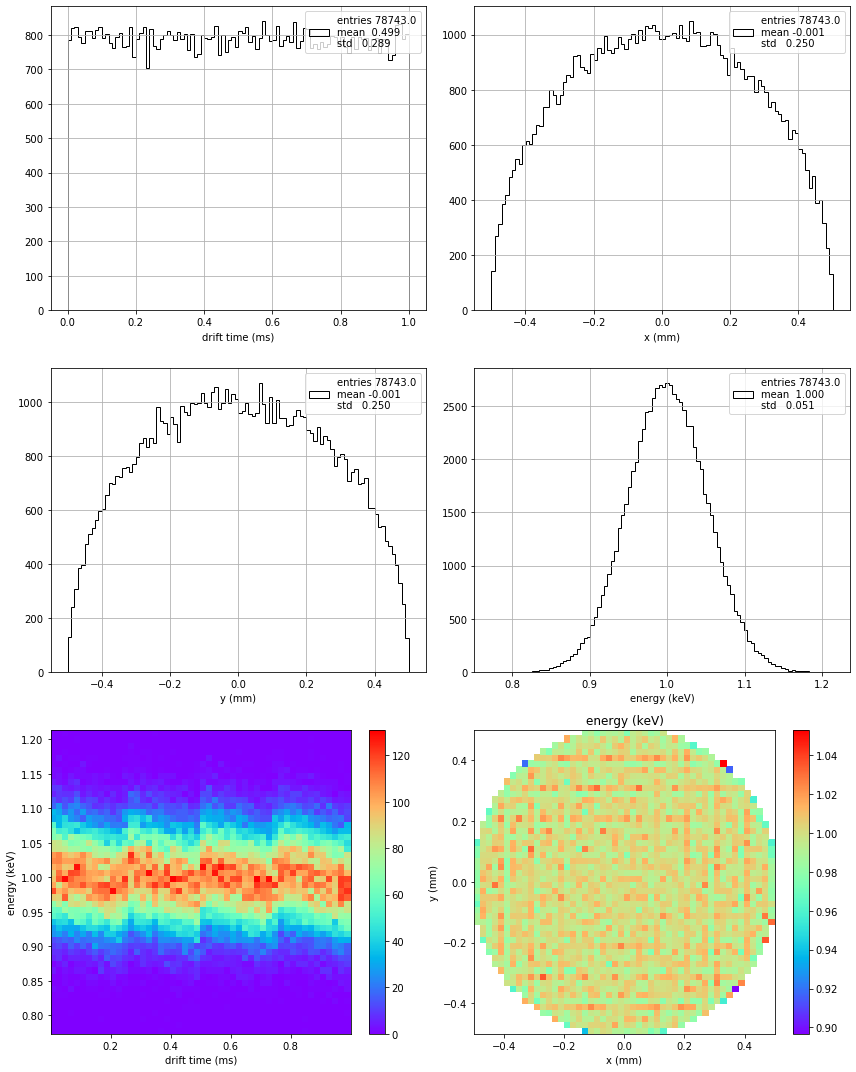

In [75]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50);

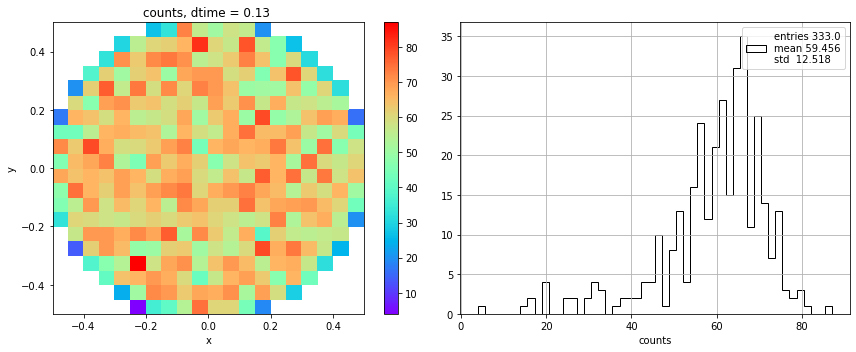

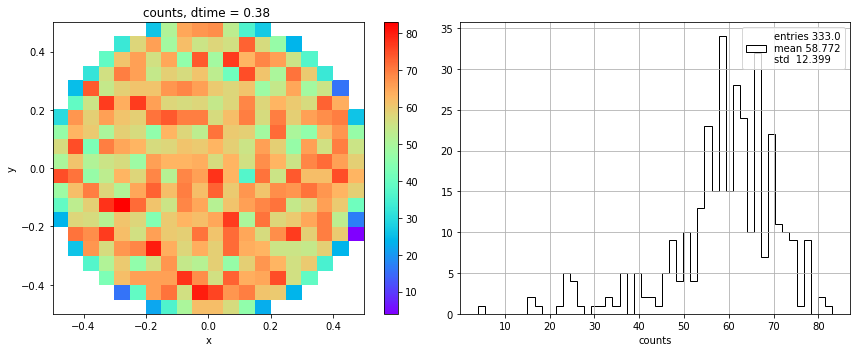

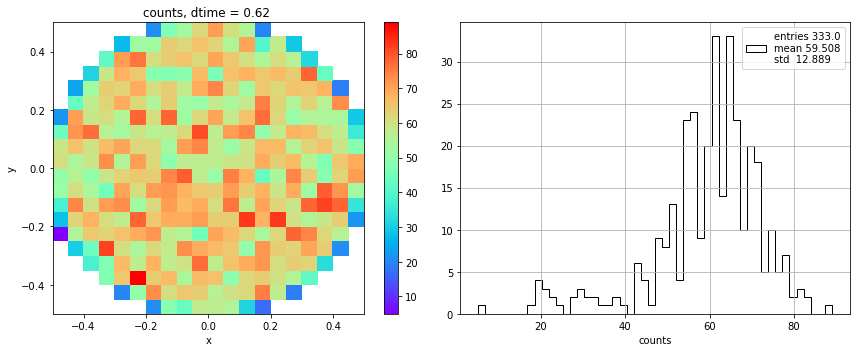

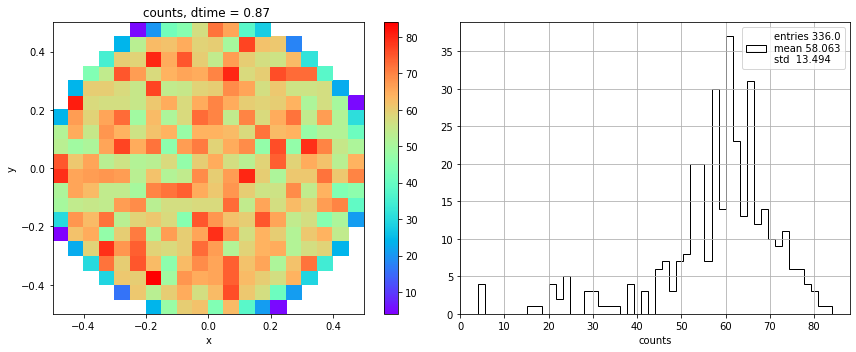

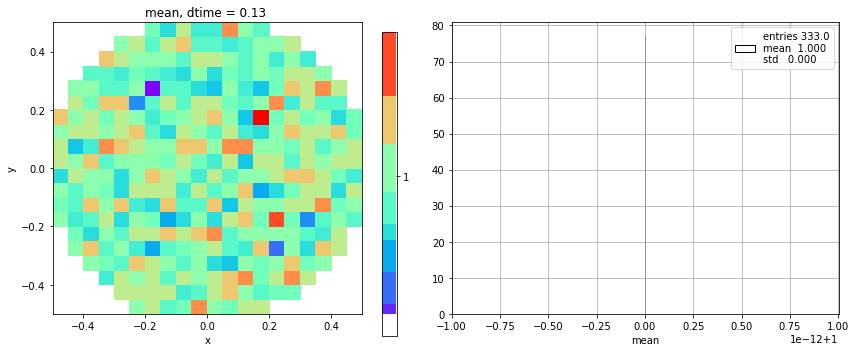

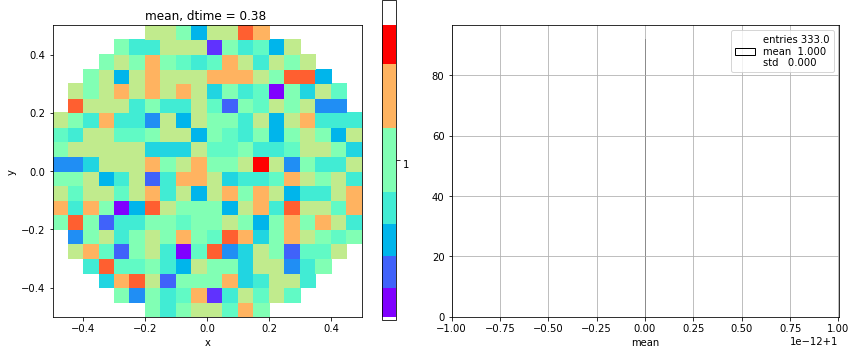

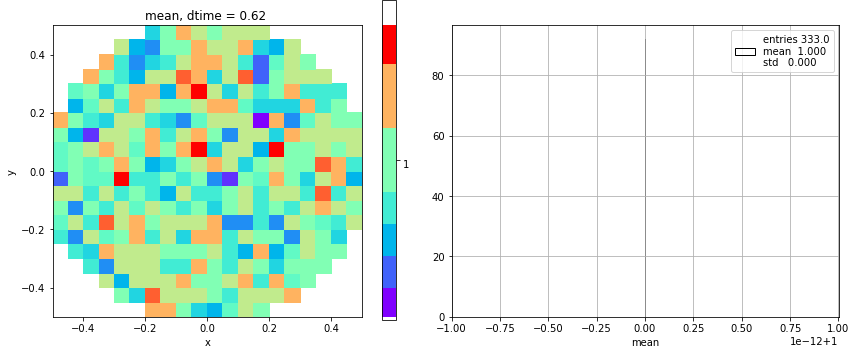

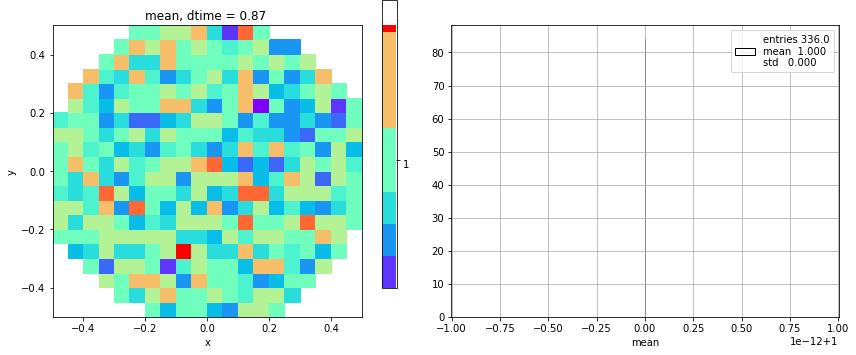

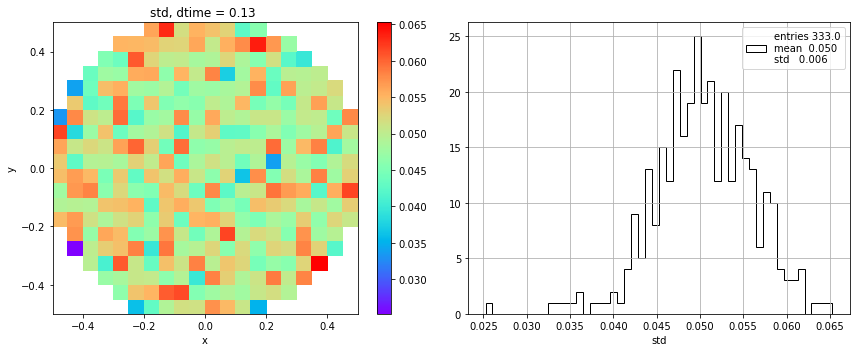

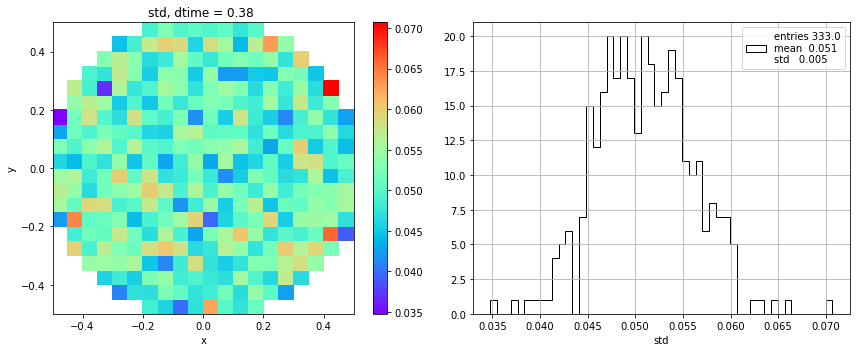

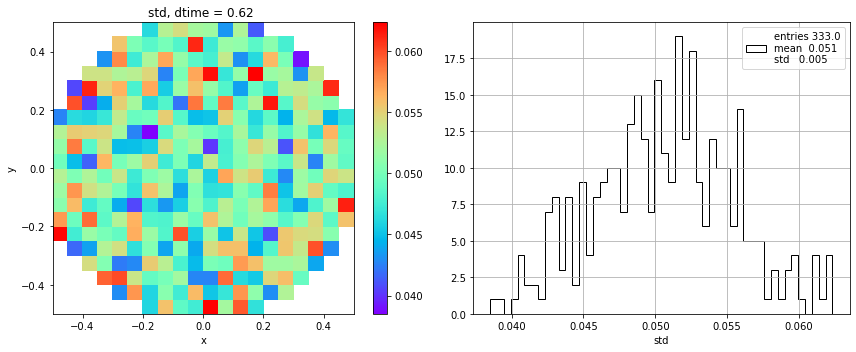

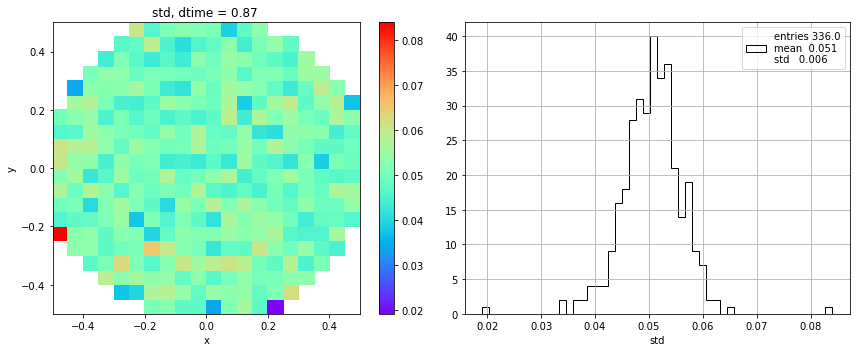

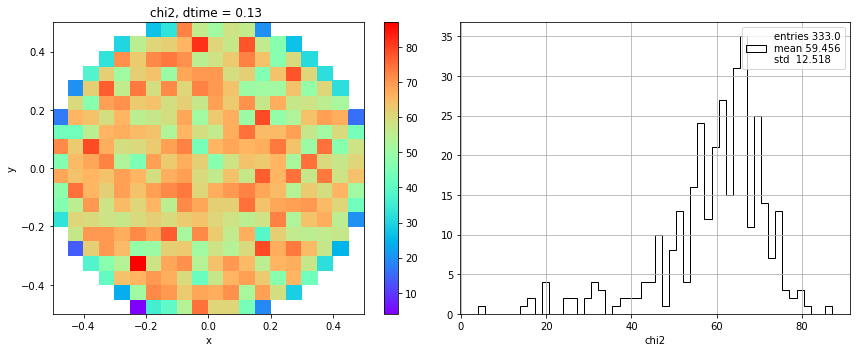

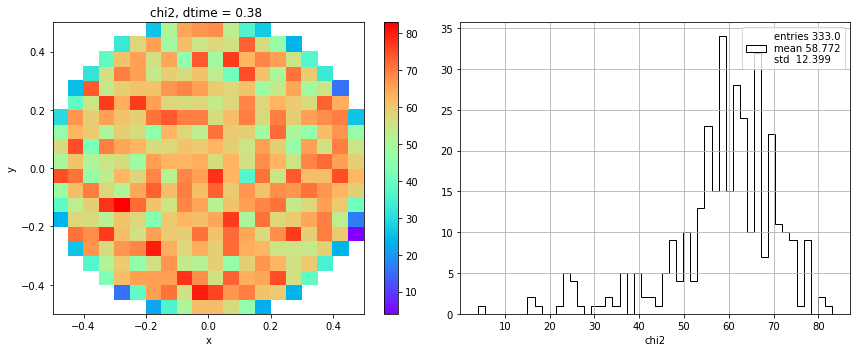

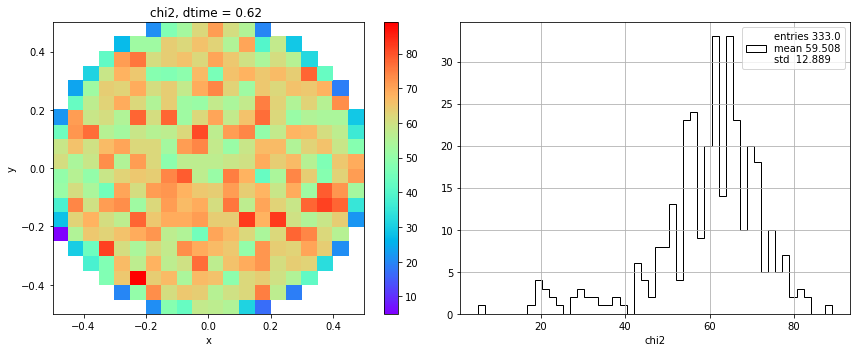

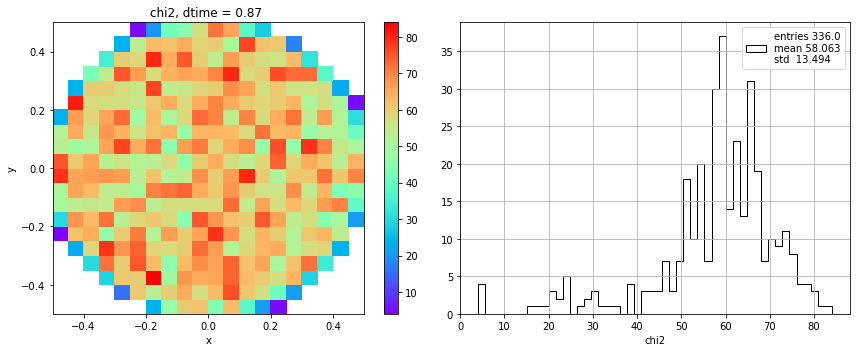

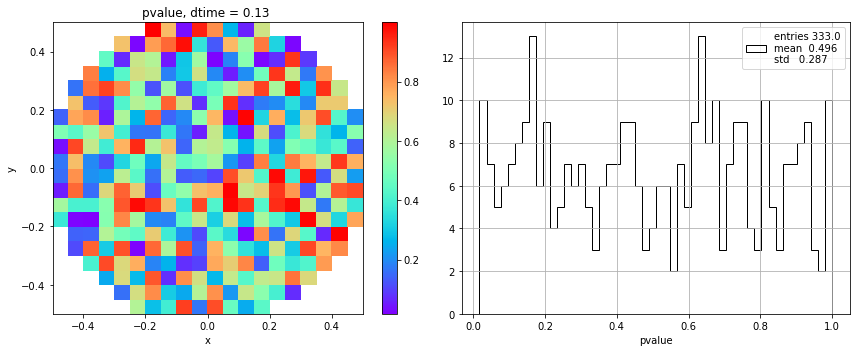

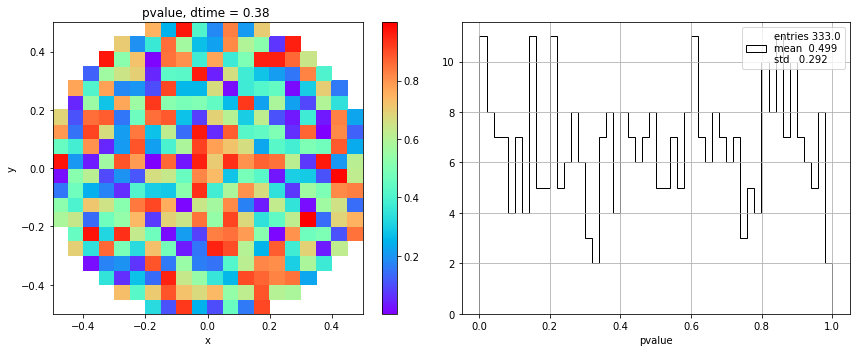

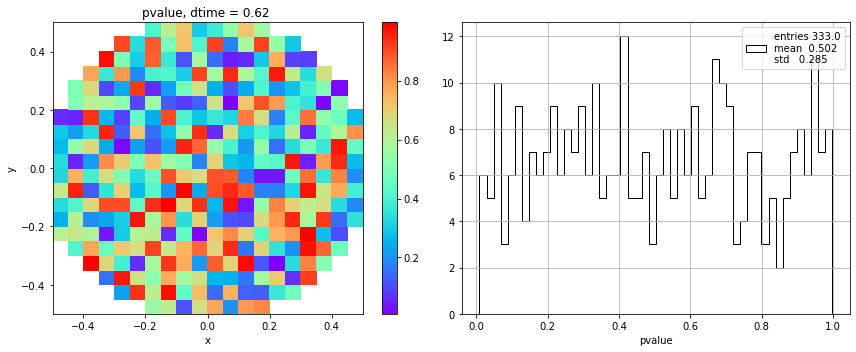

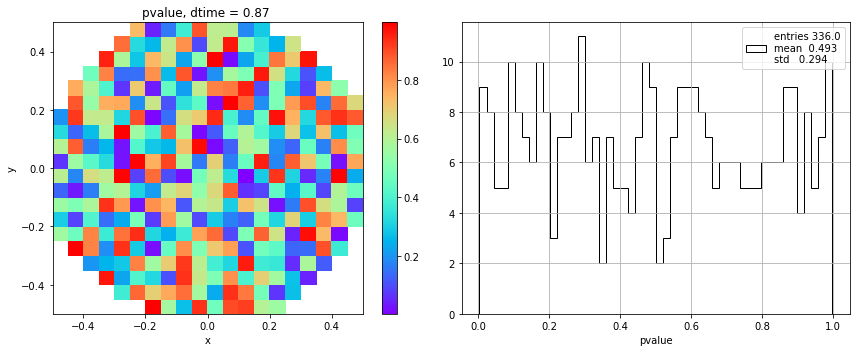

In [76]:
prof.plot_profile(corkrmap, coornames = ('x', 'y', 'dtime'));